# ➰ 목표

### 🌼 프로젝트1
####: 손수 선형회귀를 설계하여 당뇨병 수치를 맞춰보자

- 프로젝트 1을 통해 손실함수, 모델, 기울기 등을 직접 구현하여 다변수 선형회귀의 흐음을 파악하고 이해한다.  
  
    
### 🌼 프로젝트2
####: 시간, 온도, 습도, 계절등의 정보가 담긴 데이터를 통해 자전거의 대여량을 예측하자

- 프로젝트 2을 통해 기존의 모델을 활용하여 다변수 선형회귀의 흐음을 파악하고 이해한다

### 🌼 추가학습
-  더 나아가 다양한 회귀 모델로 학습을 진행한 후 가장 좋은 성능을 보이는 모델을 통해 직접 구현한 다양한 손실함수를 적용해보고 각 프로젝트에는 어떠한 손실함수를 사용했을 때 성능이 가장 좋은가를 파악해 본다.  

### 🌼 학습과정
- 데이터 가져오기
- 모델 준비하기
- 모델 학습 후, 성능 확인하기
- 예측 데이터 시각화하기

# ➰ 프로젝트를 진행하는 데 필요한 라이브러리

In [133]:

from sklearn.datasets import load_diabetes # 당뇨병 데이터셋 가져오기

from sklearn.model_selection import train_test_split
# 데이터를 train data, test data로 분리하기 위한 함수

import pandas as pd # DataFrame 사용라여 데이터 파악하기 위함
import numpy as np # 데이터간의 상관관계를 파악하기 위함
import matplotlib.pyplot as plt # 데이터를 시각화함으로써 직관적으로 확인하기 위함


# ➰ 프로젝트1

### 🌼 데이터 가져오기

- diabetes 내의 데이터 확인하기

In [134]:

diabetes = load_diabetes() # load_diabetes데이터 호출

print(diabetes.keys()) # diabetes내에 존재하는 데이터 확인
# dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

df_X = diabetes.data # feature data 지정
df_y = diabetes.target # label data 지정

print(df_X.shape) # (442, 10) 442개의 데이터가 있고 각각 10개의 데이터를 가지고 있음
print(diabetes.data[0]) # 첫번째 데이터 확인

# [ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
#  -0.04340085 -0.00259226  0.01990842 -0.01764613]

print(diabetes.feature_names) # 위의 데이터가 각각 무엇을 의미하는 지 파악

# ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

print(df_y.shape) #(442, ) 442개의 label데이터 존재
print(df_y[:20]) # 당뇨병 수치 확인


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
(442,)
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.]



> : diabetes의 첫번째 행을 보면 나이 값이 0.038076인 것을 확인할 수 있는데 이는 사이킷런에서 모튼 특성이 -0.2 ~ 0.2사이에 분포하도록 해서 그렇다.





In [135]:
print(diabetes.DESCR) # 데이터에 대한 요약 정보 확인

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

|변수(feature, variable)| 정의||변수(feature, variable)| 정의
|-----|------||-----|------|
|age|나이|sex|성별
|bmi|체질량 지수|bp|평균 혈압
|s1|tc, 총 혈청 콜레스테롤|s2|ldl, 저밀도 지단백질
|s3|hdl, 고밀도 지단백질|s4|ch, 총 콜레스테롤/HDL
|s5|ltg, 아마도 혈청 트리글리세리드 수준의 로그|s6|xglu, 혈당 수치


> diabetes.DESCR을 통해 당뇨병 수치를 결정하는 데에는 bmi와 혈당 수치를 나타내는 s6가 중요한 요소가 될 것이라는 가설을 세울 수 있다




- DataFrame을 통해 데이터 파악하기

In [136]:
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names) # diabetes의 데이터를 한 눈에 파악하기 위해 DataFrame 생성
df_diabetes["label"] = df_y # 생성한 DataFrame에 당뇨병 수치를 나타내는 label 컬럼 추가

print(df_diabetes.head()) # 데이터 확인

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  label  
0 -0.002592  0.019908 -0.017646  151.0  
1 -0.039493 -0.068330 -0.092204   75.0  
2 -0.002592  0.002864 -0.025930  141.0  
3  0.034309  0.022692 -0.009362  206.0  
4 -0.002592 -0.031991 -0.046641  135.0  


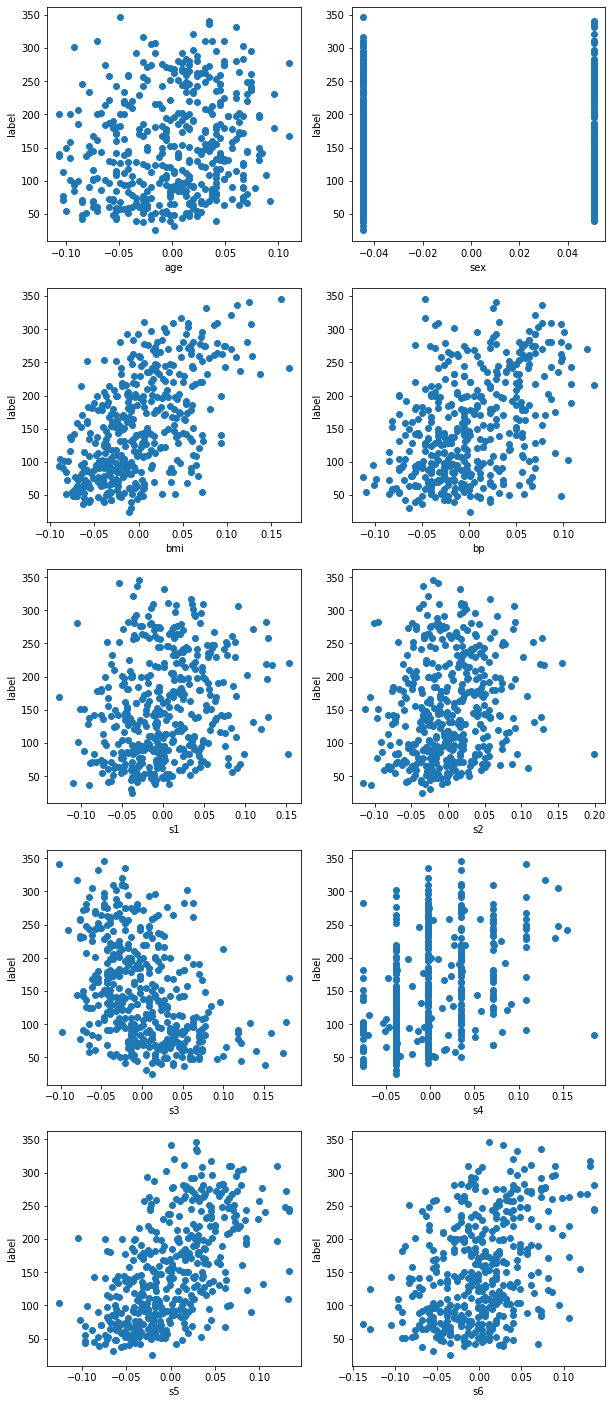

In [137]:
# 직관적인 데이터 확인
fig, ax = plt.subplots(5, 2, figsize=(10, 25))

li = [['age', 'sex'], ['bmi', 'bp'], ['s1', 's2'], ['s3', 's4'], ['s5', 's6']]
count = 0

for i, j in li:

  ax[count, 0].scatter(df_diabetes[i], df_diabetes['label'])
  ax[count, 0].set_xlabel(i)
  ax[count, 0].set_ylabel("label")

  ax[count, 1].scatter(df_diabetes[j], df_diabetes['label'])
  ax[count, 1].set_xlabel(j)
  ax[count, 1].set_ylabel("label")
  count += 1

plt.show()



> 위 산점도를 통해 각 데이터와 label의 상관관계를 파악할 수 있고 s4에서는 특정 수치가 있다는 사실을 확인 할 수 있습니다.





- 정확한 상관계수 파악

In [138]:

li = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'] # label 데이터와의 상관관계를 파악할 컬럼 리스트

for i in li:
  print(i, "와 label의 상관관계") # 어떤 컬럼과의 상관관계인지 나타냄
  print(np.corrcoef(df_diabetes[i], df_diabetes["label"]), end="\n\n") # i에 들어갈 컬럼과 label 컬럼의 상관관계를 나타내는 함수


age 와 label의 상관관계
[[1.         0.18788875]
 [0.18788875 1.        ]]

sex 와 label의 상관관계
[[1.       0.043062]
 [0.043062 1.      ]]

bmi 와 label의 상관관계
[[1.         0.58645013]
 [0.58645013 1.        ]]

bp 와 label의 상관관계
[[1.         0.44148385]
 [0.44148385 1.        ]]

s1 와 label의 상관관계
[[1.         0.21202248]
 [0.21202248 1.        ]]

s2 와 label의 상관관계
[[1.         0.17405359]
 [0.17405359 1.        ]]

s3 와 label의 상관관계
[[ 1.         -0.39478925]
 [-0.39478925  1.        ]]

s4 와 label의 상관관계
[[1.         0.43045288]
 [0.43045288 1.        ]]

s5 와 label의 상관관계
[[1.         0.56588343]
 [0.56588343 1.        ]]

s6 와 label의 상관관계
[[1.         0.38248348]
 [0.38248348 1.        ]]





> 위 코드를 통해 당뇨병 수치를 나타내는 label를 결정하는 데 중요한 요소가 되는 컬럼이 무엇인지 알 수 있다.

> bmi > s5 > bp > s4 > s3 > s6 > s1 > age > s2 > sex 순으로 상관관계가 높은 것을 확인할 수 있다.

> 이를 통해 앞서 세운 bmi와 혈당 수치를 나타내는 s6가 중요한 요소가 될 것이라는 가설의 일부분이 맞음을 알 수 있다. 중요한 요소가 될 것이라 생각한 s6와는 달리 s4, s3가 더 중요한 요소임을 파악할 수 있다.




### 🌼 모델 준비하기

- train data, test data 분리 기능을 하는 함수
- 손실함수 loss 값을 구하는 기능을 하는 함수
- 기울기를 구하는 기능을 하는 gradient 함수
- 하이퍼 파라미터인 학습률 입력 받아 설정하기

: 위의 4가지 기능을 하는 클래스를 생성

In [139]:
class Regression_Model:

  def __init__(self, data, label, learning_rate=0.001): # 데이터 초기화 함수
    self.data = data # data 변수 초기화
    self.label = label # label 변수 초기화

    self.w = None # 가중치 초기화
    self.b = None #모델의 bias

    self.losses = []

    self.learning_rate = learning_rate # learning_rate 변수 초기화

  def data_split(self):  # 데이터 분리 함수 생성
    X_train, X_test, y_train, y_test = train_test_split(self.data, self.label,
                                                            test_size=0.2, random_state=7)
    return X_train, X_test, y_train, y_test
    
  def mse_loss(self, x, y):
    y_pred = self.model(x)
    loss = ((y_pred - y) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    
    return loss
    
  def gradient(self, x, y):
    N = len(self.w) # 가중치의 개수

    y_pred = self.model(x)
    
    dw = 1 / N * 2 * x.T.dot(y_pred - y) # 공식에 맞게 gradient 계산
    db = 2 * (y_pred - y).mean() # b의 gradient 계산

    return dw, db, y_pred
    
  def model(self, x):
    predictions = 0
    for i in range(10):
        predictions += x[:, i] * self.w[i]
    predictions += self.b
    return predictions

  def fit(self):
    X_train, X_test, y_train, y_test = self.data_split()

    self.w = np.random.rand(10) # 10개의 난수 랜덤 생성
    self.b = np.random.rand()

    for i in range(1, 1001):
      dw, db, y_pred = self.gradient(X_train, y_train)
      self.w -= self.learning_rate * dw
      self.b -= self.learning_rate * db
      loss = self.mse_loss(X_train, y_train)
      self.losses.append(loss)

      if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, loss))

    return X_test, y_test, y_pred

    def loss_plot(self):
      plt.plot(self.losses)
      plt.show()
  

### 🌼 모델 학습 후, 성능 확인하기



In [140]:
model = Regression_Model(data=df_X, label=df_y, learning_rate=0.001)
a, b, c = model.fit()

Iteration 10 : Loss 28853.4677
Iteration 20 : Loss 27930.5037
Iteration 30 : Loss 27042.9788
Iteration 40 : Loss 26189.5108
Iteration 50 : Loss 25368.7716
Iteration 60 : Loss 24579.4852
Iteration 70 : Loss 23820.4255
Iteration 80 : Loss 23090.4144
Iteration 90 : Loss 22388.3202
Iteration 100 : Loss 21713.0551
Iteration 110 : Loss 21063.5742
Iteration 120 : Loss 20438.8735
Iteration 130 : Loss 19837.9881
Iteration 140 : Loss 19259.9910
Iteration 150 : Loss 18703.9917
Iteration 160 : Loss 18169.1341
Iteration 170 : Loss 17654.5960
Iteration 180 : Loss 17159.5873
Iteration 190 : Loss 16683.3486
Iteration 200 : Loss 16225.1504
Iteration 210 : Loss 15784.2919
Iteration 220 : Loss 15360.0993
Iteration 230 : Loss 14951.9256
Iteration 240 : Loss 14559.1488
Iteration 250 : Loss 14181.1713
Iteration 260 : Loss 13817.4190
Iteration 270 : Loss 13467.3402
Iteration 280 : Loss 13130.4046
Iteration 290 : Loss 12806.1029
Iteration 300 : Loss 12493.9455
Iteration 310 : Loss 12193.4620
Iteration 320 : L

손실함수는 4700 ~ 4800대로 떨어졌지만 3000 이하를 달성하기 위해 learning rate를 조정했다.

- 시도1

In [141]:
model = Regression_Model(data=df_X, label=df_y, learning_rate=0.0001)
a, b, c = model.fit()

Iteration 10 : Loss 29668.0494
Iteration 20 : Loss 29570.9993
Iteration 30 : Loss 29474.3285
Iteration 40 : Loss 29378.0356
Iteration 50 : Loss 29282.1190
Iteration 60 : Loss 29186.5772
Iteration 70 : Loss 29091.4088
Iteration 80 : Loss 28996.6122
Iteration 90 : Loss 28902.1861
Iteration 100 : Loss 28808.1288
Iteration 110 : Loss 28714.4390
Iteration 120 : Loss 28621.1153
Iteration 130 : Loss 28528.1560
Iteration 140 : Loss 28435.5599
Iteration 150 : Loss 28343.3254
Iteration 160 : Loss 28251.4512
Iteration 170 : Loss 28159.9357
Iteration 180 : Loss 28068.7777
Iteration 190 : Loss 27977.9756
Iteration 200 : Loss 27887.5280
Iteration 210 : Loss 27797.4336
Iteration 220 : Loss 27707.6909
Iteration 230 : Loss 27618.2985
Iteration 240 : Loss 27529.2551
Iteration 250 : Loss 27440.5593
Iteration 260 : Loss 27352.2096
Iteration 270 : Loss 27264.2048
Iteration 280 : Loss 27176.5434
Iteration 290 : Loss 27089.2241
Iteration 300 : Loss 27002.2455
Iteration 310 : Loss 26915.6063
Iteration 320 : L

: learning_rate를 0.0001로 조정했더니 오히려 좋지 않은 결과를 냈다.

- 시도2

In [142]:
model = Regression_Model(data=df_X, label=df_y, learning_rate=0.01)
a, b, c = model.fit()

Iteration 10 : Loss 21556.1274
Iteration 20 : Loss 16080.0015
Iteration 30 : Loss 12369.4996
Iteration 40 : Loss 9843.3783
Iteration 50 : Loss 8112.9378
Iteration 60 : Loss 6918.1001
Iteration 70 : Loss 6084.7250
Iteration 80 : Loss 5496.1059
Iteration 90 : Loss 5073.9341
Iteration 100 : Loss 4765.5825
Iteration 110 : Loss 4535.6117
Iteration 120 : Loss 4360.0933
Iteration 130 : Loss 4222.8167
Iteration 140 : Loss 4112.7515
Iteration 150 : Loss 4022.3511
Iteration 160 : Loss 3946.4163
Iteration 170 : Loss 3881.3345
Iteration 180 : Loss 3824.5688
Iteration 190 : Loss 3774.3156
Iteration 200 : Loss 3729.2734
Iteration 210 : Loss 3688.4876
Iteration 220 : Loss 3651.2452
Iteration 230 : Loss 3617.0029
Iteration 240 : Loss 3585.3387
Iteration 250 : Loss 3555.9182
Iteration 260 : Loss 3528.4714
Iteration 270 : Loss 3502.7766
Iteration 280 : Loss 3478.6490
Iteration 290 : Loss 3455.9320
Iteration 300 : Loss 3434.4920
Iteration 310 : Loss 3414.2135
Iteration 320 : Loss 3394.9960
Iteration 330 

learning rate를 0.01로 조정했더니 목표 손실값이 나온 것을 확인할 수 있다.

### 🌼 예측데이터 시각화



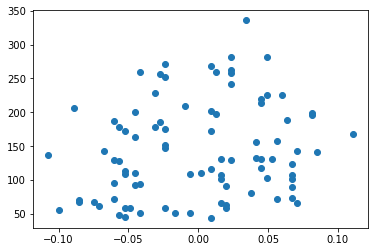

In [143]:
plt.scatter(a[:, 0], b)
plt.show()

# ➰ 프로젝트2

# ➰ 추가 학습

- 다양한 모델을 사용하여 학습 진행 후 가장 성능이 좋은 모델을 선택해 다양한 손실함수 적용해 보기

# ➰ 회고

간단한 프로젝트임에도 불구하고 개인적인 사정으로 시간이 부족해 주석, 자세한 설명, 회고 등을 제대로 작성하지 못하고 마무리한 것이 아쉽다.

앞으로 시간 여유가 될 때마다 못 다한 프로젝트2와 추가학습, 프로젝트 수정을 거듭 진행할 예정이다.

# ➰ 참고

https://hwi-doc.tistory.com/entry/matplotlib-%EC%99%84%EB%B2%BD-%EC%A0%95%EB%A6%AC

https://yhyun225.tistory.com/11

https://teddylee777.github.io/scikit-learn/gradient-descent


프로젝트 2에서 사용한 데이터 입니다.
